In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib as mpl

/home/poornima/miniconda3/envs/mosaiks/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = pd.read_csv("~/Downloads/Mosaiks_features.csv")

In [3]:
df_lat_lon = pd.DataFrame({"Lat": df["Lat"],
                           "Lon": df["Lon"]})


In [5]:
# df_lat_lon.to_csv("../../data/01_preprocessed/mosaiks_request_points/urb_rur_request_points.csv")

In [6]:
geometry = [Point(xy) for xy in zip(df["Lon"], df["Lat"])]
gdf = GeoDataFrame(df_lat_lon, geometry=geometry)

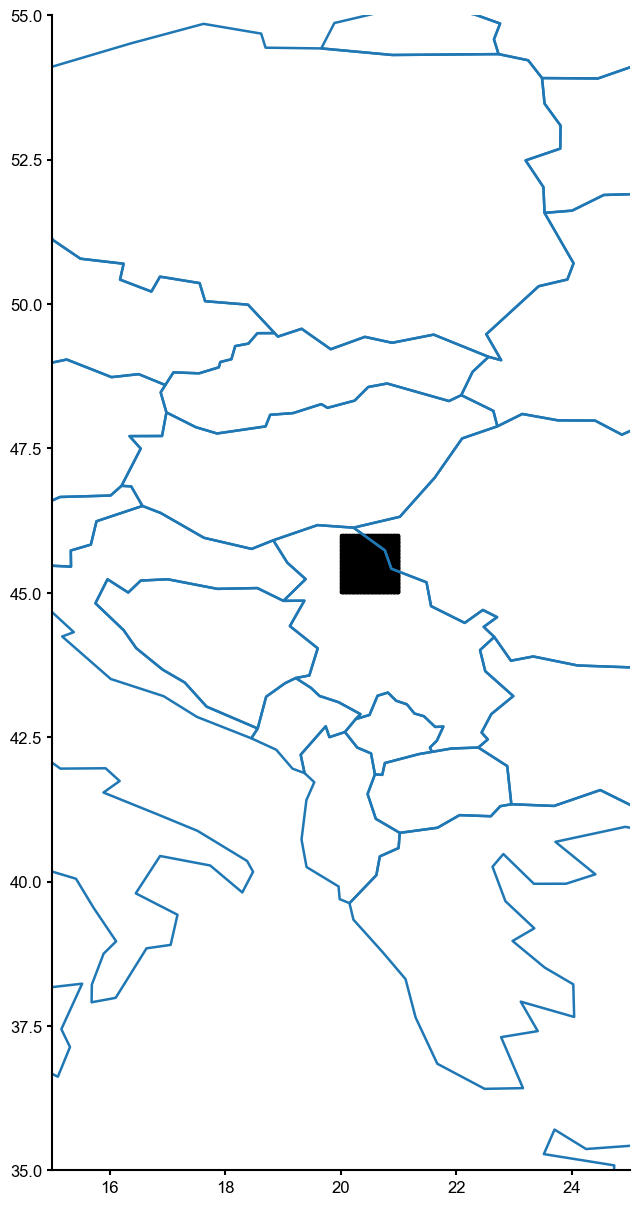

In [7]:
with mpl.rc_context(fname="./matplotlibrc"):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.boundary.plot(figsize=(15, 15)), 
            marker='o', color='k',
            markersize=2)
    plt.xlim(15, 25)
    plt.ylim(35, 55)


In [8]:
import mosaiks.utils as utl
import os

In [9]:
rasterio_config = utl.load_yaml_config("rasterioc_config.yaml")
os.environ.update(rasterio_config)

In [10]:
featurisation_params = utl.load_yaml_config("featurisation.yaml")
satellite_config = utl.load_yaml_config("satellite_config.yaml")
data_sources = utl.load_yaml_config("data_catalog.yaml")

In [11]:
request_points_gdf = utl.load_df_w_latlons_to_gdf(dataset_name="request_points_grid_05")

In [12]:
points_gdf = request_points_gdf.sample(200)

In [26]:
from mosaiks.featurize.stacs import sort_by_hilbert_distance, fetch_stac_items
satellite_config, featurisation_params

({'landsat-8-c2-l2': {'resolution': 30,
   'dtype': 'int16',
   'bands': ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7'],
   'buffer_distance': 1200,
   'min_image_edge': 30},
  'sentinel-2-l2a': {'resolution': 10,
   'dtype': 'int16',
   'bands': ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B11', 'B12'],
   'buffer_distance': 1200,
   'min_image_edge': 90}},
 {'satellite_search_params': {'satellite_name': 'landsat-8-c2-l2',
   'seasonal': False,
   'year': 2014,
   'search_start': '2013-04-01',
   'search_end': '2014-03-31',
   'stac_output': 'least_cloudy',
   'stac_api': 'planetary-compute'},
  'num_features': 4000,
  'kernel_size': 3,
  'batch_size': 10,
  'device': 'cpu',
  'dask': {'n_partitions': 200}})

In [ ]:
points_gdf_sorted = sort_by_hilbert_distance(points_gdf)

In [28]:
featurisation_params["satellite_search_params"].pop("seasonal")
featurisation_params["satellite_search_params"].pop("year")
points_gdf_w_stac = fetch_stac_items(points_gdf, 
    **featurisation_params["satellite_search_params"])

/home/poornima/miniconda3/envs/mosaiks/lib/python3.10/site-packages/shapely/geometry/geo.py:123: ShapelyDeprecationWarning: GeometryTypeError will derive from ShapelyError and not TypeError or ValueError in Shapely 2.0.
  raise GeometryTypeError("Unknown geometry type: %s" % geom_type)


Signature: shapely.geometry.mapping(ob)
Docstring:
Returns a GeoJSON-like mapping from a Geometry or any
object which implements __geo_interface__

Parameters
----------
ob :
    An object which implements __geo_interface__.

Returns
-------
dict

Example
-------
>>> pt = Point(0, 0)
>>> mapping(pt)
{'type': 'Point', 'coordinates': (0.0, 0.0)}
File:      ~/miniconda3/envs/mosaiks/lib/python3.10/site-packages/shapely/geometry/geo.py
Type:      function